In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função para gerar dados
from pyod.utils.data import generate_data

In [ ]:
# Gerar dados aleatórios com 2 eixos
Dados_X, Dados_Y = generate_data( n_train=1000, train_only=True, n_features=2 )

# Seprar os valores em 2 eixo e ajustar o eixo
Eixo_X = Dados_X[:,[0] ].reshape(-1, 1)
Eixo_Y = Dados_X[:,[1] ].reshape(-1, 1)

# Criar uma Tabela
Tabela = pd.DataFrame( Eixo_X, columns=['Eixo X'] )
Tabela['Eixo Y'] = Eixo_Y
Tabela['Classe'] = Dados_Y

# Verificando
Tabela.head()

,Eixo X,Eixo Y,Classe
0,1.832173,2.022635,0.0
1,1.616078,2.136643,0.0
2,1.827973,1.528308,0.0
3,2.220576,2.360911,0.0
4,1.761165,2.168539,0.0


In [ ]:
# Divisão dos Outliers
Tabela.Classe.value_counts( normalize=True ) * 100

0.0    90.0
1.0    10.0
Name: Classe, dtype: float64

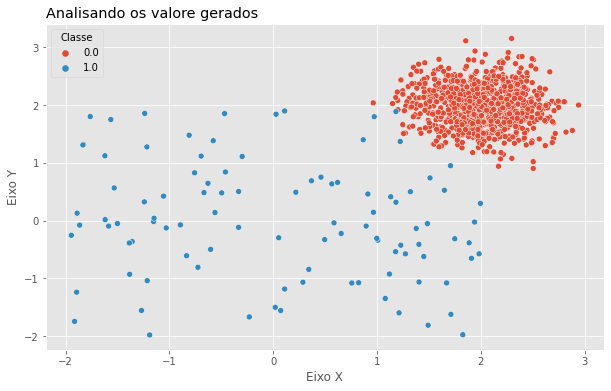

In [ ]:
# Estilo
plt.style.use('ggplot')

# Tamanho da imagem
plt.figure( figsize=(10, 6) )

# Titulo do grafico
plt.title('Analisando os valore gerados', loc='left')

# Plot com os parametros
sns.scatterplot( data=Tabela, x='Eixo X', y='Eixo Y', hue='Classe' );

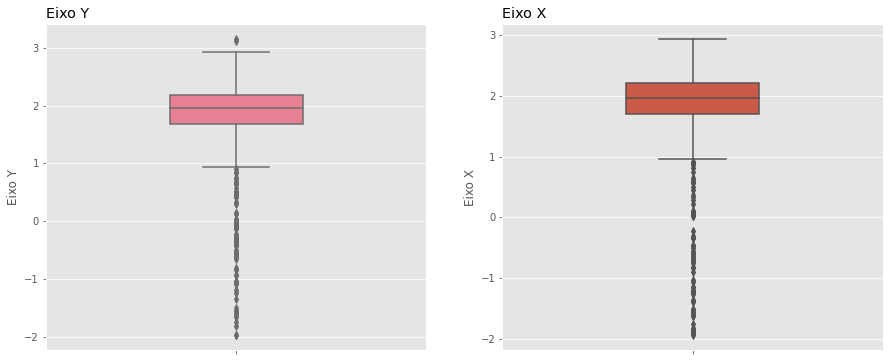

In [ ]:
# Tamanho da imagem
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)
# Titulo do grafico
plt.title('Eixo Y', loc='left')
# Plot com os parametros
sns.boxplot( data=Tabela, y='Eixo Y', width=0.35, palette='husl' );

# Grid 2
plt.subplot(1, 2, 2)
# Titulo do grafico
plt.title('Eixo X', loc='left')
# Plot com os parametros
sns.boxplot( data=Tabela, y='Eixo X', width=0.35 );

In [ ]:
# IQR

# Calculando o 1º Quartil
Q1 = np.percentile( Tabela['Eixo X'], 25, interpolation = 'midpoint')

# Calculando o 3º Quartil
Q3 = np.percentile( Tabela['Eixo X'], 75,interpolation = 'midpoint')

# Calculando o IQR [ intervalo interquartil ]
IQR = Q3 - Q1

# Verificando os valores
print('1º Quartil', Q1)
print('3º Quartil', Q3)
print('IQR', IQR)

1º Quartil 1.6981593669393984
3º Quartil 2.219939248751511
IQR 0.5217798818121127


In [ ]:
# Verificando os valores que serão excluidos
Superior = Tabela['Eixo X'] >= ( Q3 + 1.5 * IQR )
Inferior = Tabela['Eixo X'] <= ( Q3 - 1.5 * IQR )

print('Valores (Index) que são Outliers')
print( np.where(Inferior) )
print( np.where(Superior) )

Valores (Index) que são Outliers
(array([ 34,  79,  93, 133, 148, 156, 168, 179, 215, 235, 317, 345, 347,
       350, 400, 404, 418, 441, 463, 486, 513, 525, 526, 546, 564, 569,
       578, 625, 631, 685, 699, 700, 703, 707, 757, 764, 793, 803, 809,
       814, 823, 844, 848, 850, 853, 889, 893, 900, 903, 904, 905, 906,
       907, 908, 910, 911, 912, 913, 915, 917, 918, 919, 920, 921, 922,
       923, 925, 927, 928, 929, 930, 931, 932, 934, 935, 936, 937, 938,
       939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 950, 951, 952,
       953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 964, 965, 966,
       967, 969, 970, 972, 973, 974, 975, 976, 977, 978, 979, 981, 982,
       983, 984, 985, 986, 987, 988, 990, 991, 992, 993, 995, 996, 997,
       998, 999]),)
(array([], dtype=int64),)


In [ ]:
# APlicação

# Formulas
Menor = Q1 - 1.5 * IQR
Maior = Q3 + 1.5 * IQR

# Identificando os registros
Dados_Superior = np.where( Tabela['Eixo X'] >= Maior)
Dados_Inferior = np.where( Tabela['Eixo X'] <= Menor)

# Mostrando
Nova_Base = Tabela.drop( Dados_Superior[0] )
Nova_Base = Tabela.drop( Dados_Inferior[0] )

In [ ]:
print(f'Antes havia { Tabela.shape[0] }')
print(f'Agora temos { Nova_Base.shape[0] }')
print(f'Foi retirado { Tabela.shape[0] - Nova_Base.shape[0] } registros')

Antes havia 1000
Agora temos 933
Foi retirado 67 registros


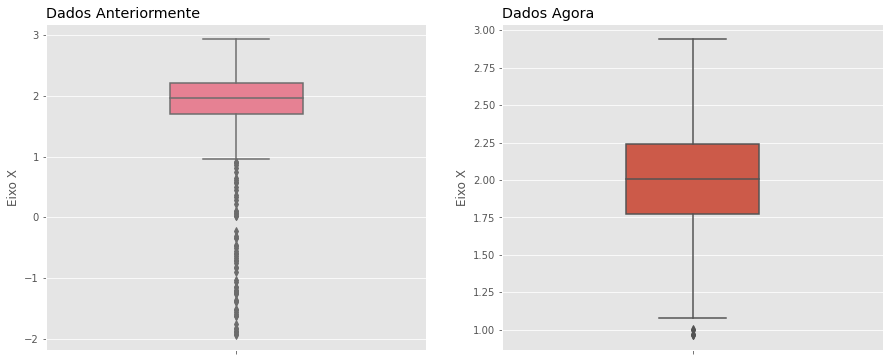

In [ ]:
# Tamanho da imagem
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)
# Titulo do grafico
plt.title('Dados Anteriormente', loc='left')
# Plot com os parametros
sns.boxplot( data=Tabela, y='Eixo X', width=0.35, palette='husl' );

# Grid 2
plt.subplot(1, 2, 2)
# Titulo do grafico
plt.title('Dados Agora', loc='left')
# Plot com os parametros
sns.boxplot( data=Nova_Base, y='Eixo X', width=0.35 );